<h3>Import libraries</h3>

In [1]:
import torch
import json
import requests
from PIL import Image
from io import BytesIO
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
from tqdm import  tqdm

<h3>Setup</h3>

In [2]:
annotation_path = "data/pizzacam.json"
save_image_path = "data/pizza_image"

<h3>Download images</h3>

In [3]:
def download_images(
        annotation_path: str,
        save_image_path: str,
        num_download_images: int,
    ) -> None:
    with open(annotation_path, 'r') as json_file:
        json_data = json.load(json_file)
    json_data = json_data[:num_download_images]

    for i, data in tqdm(enumerate(json_data), total=len(json_data)):
        image_url = data["image_url"]           # get url
        response = requests.get(image_url)      # request to url
        image_data = BytesIO(response.content)  # convert from bytes -> image
        image = Image.open(image_data)
        image_file_name = os.path.join(save_image_path, f"image_{i+1}.jpg")
        image.save(image_file_name)
    print("Save sucessfully!")

download_images(annotation_path, save_image_path, num_download_images=10)

100%|██████████| 10/10 [00:37<00:00,  3.79s/it]

Save sucessfully!


In [4]:
model = YOLO('yolov8n-seg.pt')              # load YOLOv8 pretrained model

In [5]:
example_image = r"D:\Project_FaceNet\data\pizza_image\image_17.jpg"
image = Image.open(example_image)


0: 640x640 1 knife, 1 pizza, 213.3ms
Speed: 7.2ms preprocess, 213.3ms inference, 10.7ms postprocess per image at shape (1, 3, 640, 640)


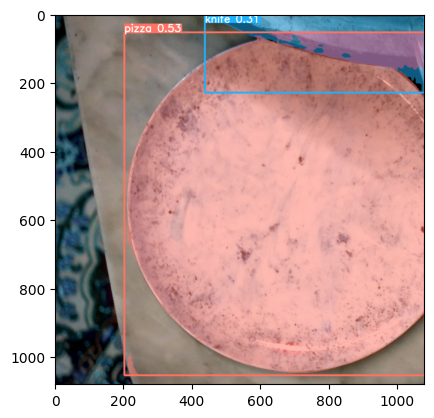

In [10]:
results = model(image)
results_image = results[0].plot()
plt.imshow(results_image)
plt.show()